In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [164]:
men = pd.read_csv('athletes-women.csv')
women = pd.read_csv('athletes-men.csv')
#women = women.drop(columns=['Name', 'Region'])
#women = women.drop([10])
women
# missing = men.isnull().sum()
# print(missing)


,Name,rank,region,longitude,latitude,age,height,weight,run400,run5k,fran,candj,snatch,deadlift,backsq,pullups,coach,certification,multiple,howlong
0,DelainaSnider,9,Canada West (British Columbia),-125.9066,49.1530,34,66,152,67,1204,53,200,150,345,280,45,1,0,1,3
1,CamilleLeblanc-Bazinet,1,South West (Virginia),-76.2875,36.7682,26,62,130,80,1180,124,230,190,300,310,80,1,1,1,3
2,SarahScholl,4,Atlantic,-87.3595,36.5298,31,68,134,58,1110,125,195,155,305,295,40,0,1,0,3
3,KatrinTanjaDavidsdottir,1,"Europe (Reykjavik, Iceland)",-21.9426,64.1466,21,67,152,67,1194,128,216,187,309,254,70,1,0,1,3
4,TalaynaFortunato,3,South East,-81.7948,26.1420,34,67,150,69,1263,128,215,190,315,275,55,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,MaryGilleland,9,Central East (Michigan),-83.4833,42.4311,53,62,130,65,1224,396,135,90,280,165,40,1,0,1,4
221,JackySchmitt,67,Luxembourg,6.1296,49.8153,20,65,134,79,1630,405,139,143,254,209,28,0,0,0,2
222,KristenLim,68,Philippines,121.7740,12.8797,22,65,147,69,1525,554,155,125,255,205,25,1,0,1,1
223,CindyHinkle,4,Mid Atlantic,-117.9003,33.9165,50,62,159,71,1353,235,155,125,270,225,51,0,0,1,3


In [165]:
from sklearn.preprocessing import scale
df = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X = scale(df)
X[0:10,]

array([[-0.4113086 , -0.28080105, -1.09719481,  0.18389228, -2.36677404,
        -0.88413799,  0.72164289],
       [-0.87635601, -1.13458801, -1.31782682,  3.7332838 , -1.22315421,
        -0.26328059,  0.18852315],
       [-0.70196323, -0.60097116, -1.96133684, -0.32316365, -1.20704688,
        -0.40181864,  0.17826092],
       [-0.87635601, -1.66820486, -1.18912481,  2.71917194, -1.15872492,
         0.41670823,  1.36706179],
       [-0.76009416, -0.28080105, -0.55480779,  1.19800414, -1.15872492,
        -0.3321905 , -0.26889537],
       [-0.87635601, -1.24131138, -1.22589681,  2.61776075, -1.1426176 ,
         0.41670823,  1.36706179],
       [-0.70196323, -0.8144179 , -1.29944081, -0.83021958, -1.12651028,
        -0.23306798,  0.5716653 ],
       [-0.58570138, -1.02786464, -0.30659678,  0.38671466, -1.12651028,
        -0.34602054, -0.00960171],
       [-0.87635601, -0.49424779, -1.36379182,  2.61776075, -1.11040296,
        -0.36487307,  0.2993157 ],
       [-0.81822509, -1.2413

In [191]:
df = men[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
M = scale(df)
M[0:10,]
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(M)
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

Text(0.5, 1.0, 'K-Means Classification Location')

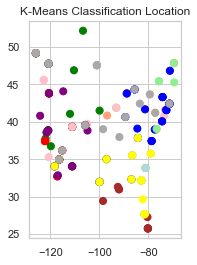

In [192]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
# mask = (df['longitude'] >= -85) & (df['longitude'] <= -75) & (df['latitude'] >= 25) & (df['latitude'] <= 35)
df2 = df.loc[mask]
df2
x = scale(df2)
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=12,random_state=4)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

In [166]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [167]:
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

Text(0.5, 1.0, 'K-Means Classification Pullups')

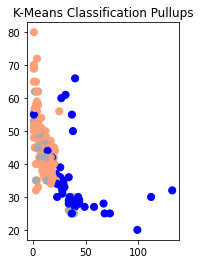

In [168]:
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

Text(0.5, 1.0, 'K-Means Classification Location')

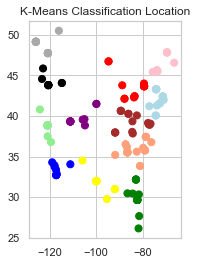

In [190]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
# mask = (df['longitude'] >= -85) & (df['longitude'] <= -75) & (df['latitude'] >= 25) & (df['latitude'] <= 35)
df2 = df.loc[mask]
df2
x = scale(df2)
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=12,random_state=4)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

In [188]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# df = women[['longitude', 'latitude']]

# # Load the example planets dataset

# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# g = sns.relplot(
#     data=df,
#     x=df['longitude'], y=['latitude'],
#     hue="year", size="mass",
#     palette=cmap, sizes=(10, 200),
# )
# g.set(xscale="log", yscale="log")
# g.ax.xaxis.grid(True, "minor", linewidth=.25)
# g.ax.yaxis.grid(True, "minor", linewidth=.25)
# g.despine(left=True, bottom=True)

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 225 and the vector passed to `y` has length 1.

In [180]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
df2 = df.loc[mask]
df2

,rank,age,run5k,pullups,fran,longitude,latitude
0,9,34,1204,45,53,-125.9066,49.1530
1,1,26,1180,80,124,-76.2875,36.7682
2,4,31,1110,40,125,-87.3595,36.5298
4,3,34,1263,55,128,-81.7948,26.1420
6,4,29,1182,35,130,-73.8729,45.6689
...,...,...,...,...,...,...,...
217,18,51,1400,39,355,-120.5542,43.8041
218,17,54,1349,42,368,-88.7879,43.7844
220,9,53,1224,40,396,-83.4833,42.4311
223,4,50,1353,51,235,-117.9003,33.9165


Text(0.5, 1.0, 'K-Means Classification Location')

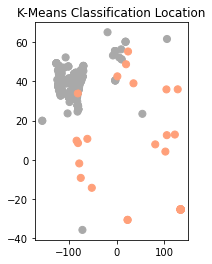

In [105]:
plt.subplot(1,2,2)
plt.scatter(x=df['longitude'],y=df['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Run5k')

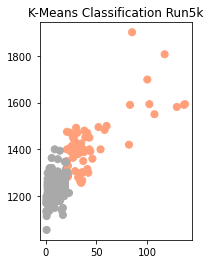

In [94]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

In [106]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

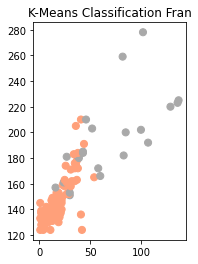

In [107]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

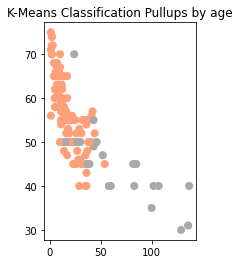

In [108]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

Text(0.5, 1.0, 'K-Means Classification Location')

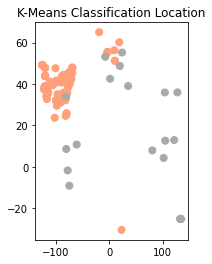

In [109]:
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Pullups')

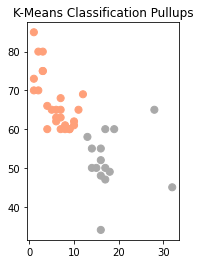

In [98]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')